In [20]:
import igraph
from igraph import plot
# import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pyplot as plt
import time
pd.set_option('display.max_rows', 50)

In [4]:
data = pd.read_csv('data/influence_data.csv')
data

,inf_id,influencer_id,influencer_name,influencer_main_genre,influencer_active_start,flw_id,follower_id,follower_name,follower_main_genre,follower_active_start
0,4010,759491,The Exploited,Pop/Rock,1980,0,74,Special Duties,Pop/Rock,1980
1,219,25462,Tricky,Electronic,1990,1,335,PJ Harvey,Pop/Rock,1990
2,559,66915,Bob Dylan,Pop/Rock,1960,1,335,PJ Harvey,Pop/Rock,1990
3,590,71209,Leonard Cohen,Pop/Rock,1950,1,335,PJ Harvey,Pop/Rock,1990
4,762,91438,The Gun Club,Pop/Rock,1980,1,335,PJ Harvey,Pop/Rock,1990
...,...,...,...,...,...,...,...,...,...,...
42765,3302,580300,Sufjan Stevens,Pop/Rock,1990,5601,3661738,Rosemary & Garlic,Pop/Rock,2010
42766,2081,261309,Vybz Kartel,Reggae,2000,5602,3670556,Trinidad Cardona,R&B;,2010
42767,2837,467203,Michael Jackson,R&B;,1960,5602,3670556,Trinidad Cardona,R&B;,2010
42768,5374,2518003,Popcaan,Reggae,2000,5602,3670556,Trinidad Cardona,R&B;,2010


In [5]:
edges=[]
for i in list(map(tuple,data[['inf_id','flw_id']].values)):
    tp=(i[0],i[1])
    if tp in edges or tp[::-1] in edges:
        continue
    else:
        edges.append(tp)
# edges

[(4010, 0),
 (219, 1),
 (559, 1),
 (590, 1),
 (762, 1),
 (950, 1),
 (1103, 1),
 (1732, 1),
 (2612, 1),
 (2687, 1),
 (2963, 1),
 (2986, 1),
 (3445, 1),
 (3599, 1),
 (3886, 1),
 (3970, 1),
 (4599, 1),
 (4825, 1),
 (4848, 1),
 (5113, 1),
 (5146, 1),
 (625, 2),
 (764, 2),
 (946, 2),
 (1120, 2),
 (1456, 2),
 (2237, 2),
 (2551, 2),
 (2801, 2),
 (2925, 2),
 (3300, 2),
 (3844, 2),
 (4238, 2),
 (4254, 2),
 (4307, 2),
 (4398, 2),
 (4525, 2),
 (4726, 2),
 (4764, 2),
 (1244, 3),
 (2188, 3),
 (3895, 3),
 (42, 5),
 (100, 5),
 (505, 5),
 (527, 5),
 (625, 5),
 (682, 5),
 (707, 5),
 (764, 5),
 (1090, 5),
 (1158, 5),
 (1516, 5),
 (1569, 5),
 (1674, 5),
 (2504, 5),
 (2521, 5),
 (2614, 5),
 (2653, 5),
 (2801, 5),
 (2931, 5),
 (2964, 5),
 (3054, 5),
 (3206, 5),
 (3274, 5),
 (3403, 5),
 (3489, 5),
 (3961, 5),
 (3970, 5),
 (4110, 5),
 (4117, 5),
 (4616, 5),
 (68, 6),
 (681, 6),
 (3163, 6),
 (3511, 6),
 (107, 10),
 (161, 10),
 (547, 10),
 (724, 10),
 (835, 10),
 (1134, 10),
 (1448, 10),
 (1745, 10),
 (1896, 1

In [6]:
# g = igraph.Graph()
# g.add_vertices(set(data['influencer_id']) | set(data['follower_id']))
# g.add_edges(data[['inf_id','flw_id']].values)
g = igraph.Graph(edges)
# g = igraph.Graph.TupleList(list(map(tuple,data[['inf_id','flw_id']].values)),directed=True)
# print(g)
out = plot(g)
out.save('org.png')

In [32]:
now = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
g_ifmp = g.community_fastgreedy()
visual_style = {}
#weights=[(int(i[0]==i[1]))+0.01 for i in data[['influencer_main_genre','follower_main_genre']].values] ,clusters=19
visual_style["vertex_size"] = 10
visual_style["layout"] = g.layout("drl")
visual_style["margin"]=80

g2 = g_ifmp.as_clustering(n=16)
out = plot(g2,**visual_style)
out.save(now+'.eps')


[9.360556941018228e-05, 0.36427256593466095, 0.44733471920304274, 0.45293852364603404, 0.45364758427351926, 0.4538842636758641, 0.4540763753087058, 0.45416448589526026, 0.45420790959547575, 0.4542264808685944, 0.45424049503278885, 0.4542545048156744, 0.45426534143558595, 0.4542746451450445, 0.45428378346009196, 0.4542920501684992, 0.45429852848137803, 0.45430331259686985, 0.45430794884318615, 0.4543125826250162, 0.45431721394236, 0.45432184279521753, 0.45432568356013586, 0.45432951747925904, 0.45433115225514403, 0.45433247267211513, 0.4543325509880118, 0.45433108927382854, 0.4543295522558985, 0.45432642454900435, 0.4543217310718405, 0.45431702773673155, 0.4543123118053595, 0.4543075947786603, 0.4543028766566338, 0.45429815743928015, 0.45429343712659925, 0.4542887157185911, 0.4542839932152557, 0.4542792696165931, 0.4542745449226033, 0.45426981913328623, 0.454265092248642, 0.4542603642686705, 0.45425563519337175, 0.4542509050227458, 0.4542461737567926, 0.4542414413955122, 0.4542367079389

In [40]:
res = g2.membership
res

n = max(res)
res_class = [[] for i in range(n+1)]
for i in range(len(res)):
    res_class[res[i]].append(i)
res_class
print(list(map(len,res_class)))

# data[['inf_id','influencer_main_genre']].groupby('influencer_main_genre').count()

[1917, 2087, 1261, 180, 46, 25, 3, 56, 3, 2, 5, 8, 2, 2, 4, 2]


,inf_id
influencer_main_genre,
Avant-Garde,79
Blues,1243
Children's,3
Classical,114
Comedy/Spoken,152
Country,3301
Easy Listening,76
Electronic,710
Folk,1010


**每个influencer的follower数**

In [32]:
infn_cnt = data[['influencer_name','follower_name']].groupby('influencer_name').count().sort_values('follower_name',ascending=False)
infn_cnt

,follower_name
influencer_name,
The Beatles,615
Bob Dylan,389
The Rolling Stones,319
David Bowie,238
Led Zeppelin,221
...,...
Grizzly Bear,1
Grimes,1
Sizzla,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f08c9aa8c50>]],
      dtype=object)

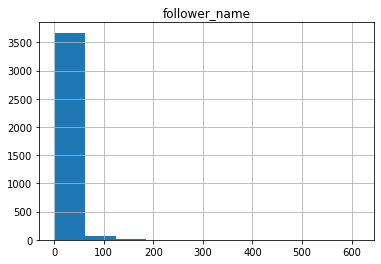

In [39]:
infn_cnt.to_csv('infn_cnt.csv')
infn_cnt.hist()

**每个风格的influencer的follower数**

Pop/Rock 24141


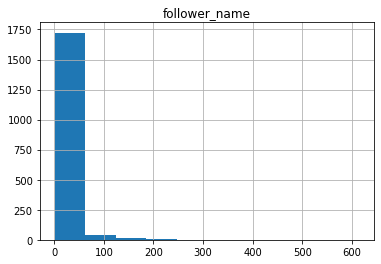

Electronic 710


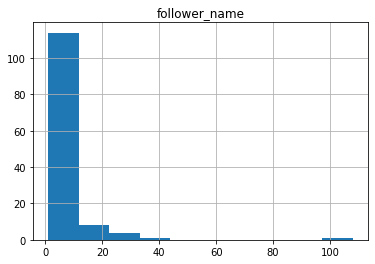

Reggae 806


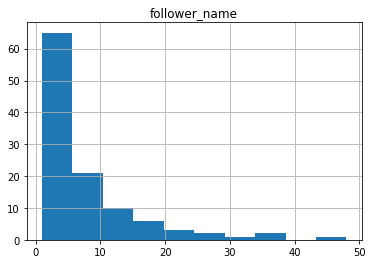

Jazz 2716


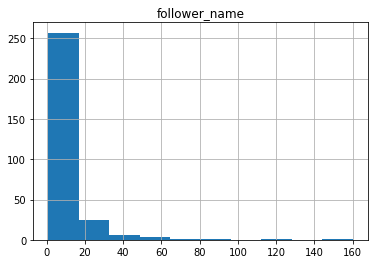

Country 3301


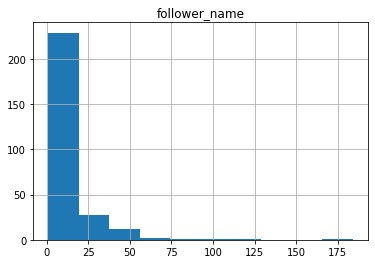

Comedy/Spoken 152


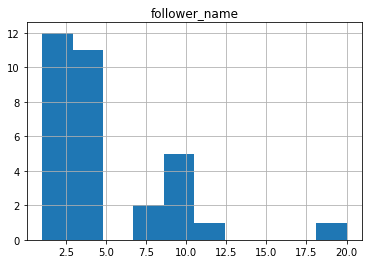

R&B; 5530


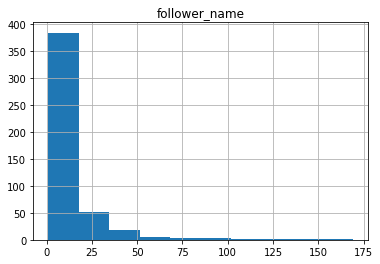

Classical 114


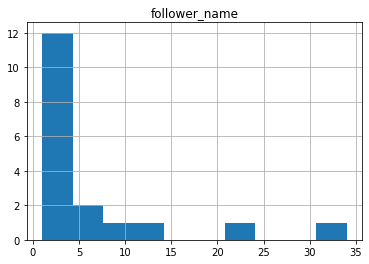

Latin 621


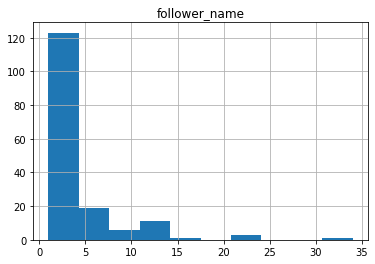

Vocal 1414


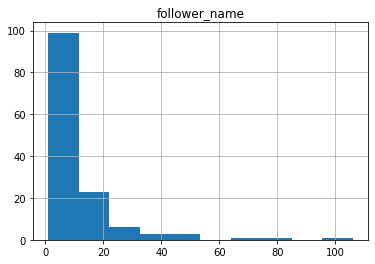

Folk 1010


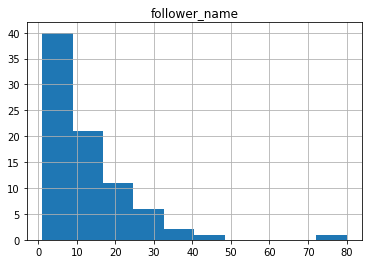

Easy Listening 76


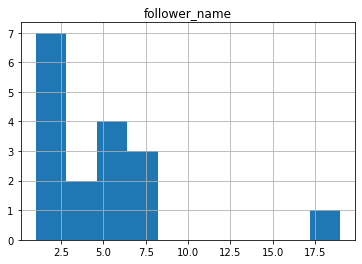

International 328


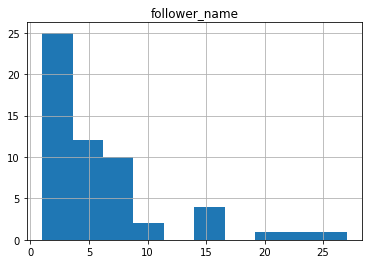

Avant-Garde 79


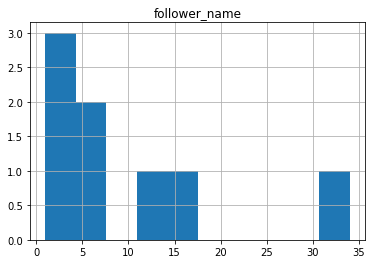

Blues 1243


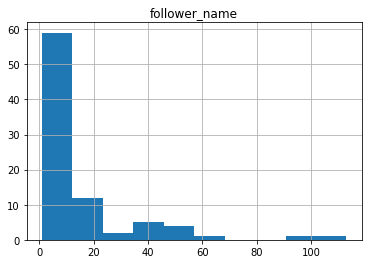

Stage & Screen 183


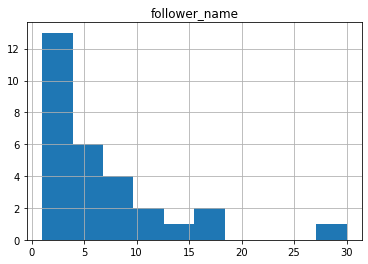

New Age 94


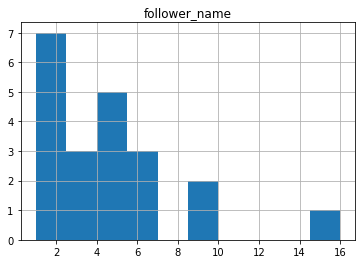

Religious 247


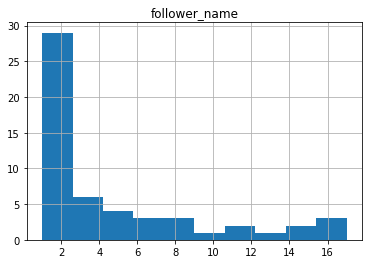

Children's 3


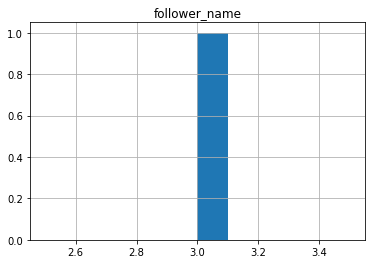

Unknown 2


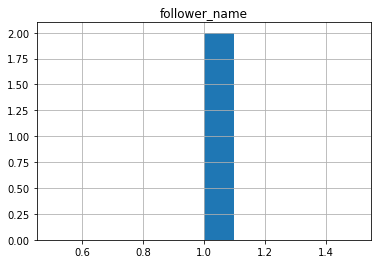

In [63]:
for i in data['influencer_main_genre'].unique():
    j = data[data['influencer_main_genre']==i][['influencer_name','follower_name']]
    print(i,len(j))
    k = j.groupby('influencer_name').count().sort_values('follower_name',ascending=False)
    k.hist()
    plt.show()

In [50]:
k

,inf_id,influencer_id,influencer_main_genre,influencer_active_start,flw_id,follower_id,follower_name,follower_main_genre,follower_active_start
influencer_name,,,,,,,,,
The Bothy Band,1,1,1,1,1,1,1,1,1
The Wonder Stuff,1,1,1,1,1,1,1,1,1


In [ ]:
# f = open('idmap.csv','a')
# t = 0
# for i in sorted(set(data['influencer_id']) | set(data['follower_id'])):
#         f.write("%d,%d\n"%(t, i))
#         t += 1
# f.close()

In [ ]:
help(igraph.community_infomap)

In [6]:
len(data['influencer_main_genre'].unique())

20

In [14]:
help(plot)

Help on function plot in module igraph.drawing:

plot(obj, target=None, bbox=(0, 0, 600, 600), *args, **kwds)
    Plots the given object to the given target.
    
    Positional and keyword arguments not explicitly mentioned here will be
    passed down to the C{__plot__} method of the object being plotted.
    Since you are most likely interested in the keyword arguments available
    for graph plots, see L{Graph.__plot__} as well.
    
    @param obj: the object to be plotted
    @param target: the target where the object should be plotted. It can be one
      of the following types:
    
        - C{None} -- an appropriate surface will be created and the object will
          be plotted there.
    
        - C{cairo.Surface} -- the given Cairo surface will be used. This can
          refer to a PNG image, an arbitrary window, an SVG file, anything that
          Cairo can handle.
    
        - C{string} -- a file with the given name will be created and an
          appropriate Cair

In [ ]:
# for i in data:
#     line = i.strip().split(’,’)
#     if (float(line[0]) in node)==False:
#         node.append(float(line[0]))
#     if (float(line[1]) in node)==False:
#         node.append(float(line[1]))
#     node1 = float(line[0])
#     node2 = float(line[1])
#     w = int(line[2])
#     wei.append(w)
#     L.append((node1,node2))